In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMA
%matplotlib inline
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Stock Price Data.csv to Stock Price Data.csv


In [4]:
df = pd.read_csv('Stock Price Data.csv')

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,31/12/2009,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
1,4/01/2010,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
2,5/01/2010,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
3,6/01/2010,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
4,7/01/2010,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4
...,...,...,...,...,...,...,...
2260,24/12/2018,129.426000,132.755997,128.544003,129.597002,129.597002,4249370.4
2261,26/12/2018,130.667997,138.209994,130.308002,138.155997,138.155997,7299830.4
2262,27/12/2018,136.320003,142.079997,135.455997,142.079997,142.079997,7170950.4
2263,28/12/2018,142.800000,143.592004,139.749000,141.611993,141.611993,6548600.4


In [6]:
df.set_index('Date',inplace=True)

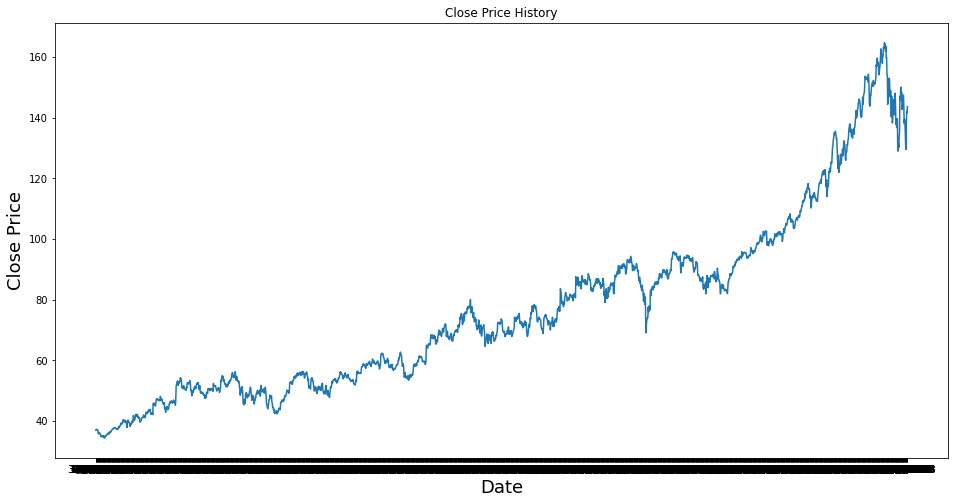

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()

In [8]:
timeseries = df['Close']

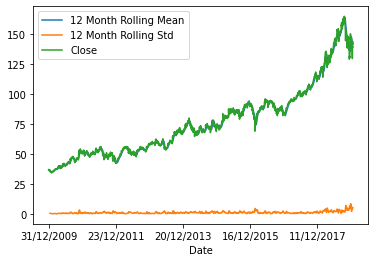

In [9]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

<Figure size 432x288 with 0 Axes>

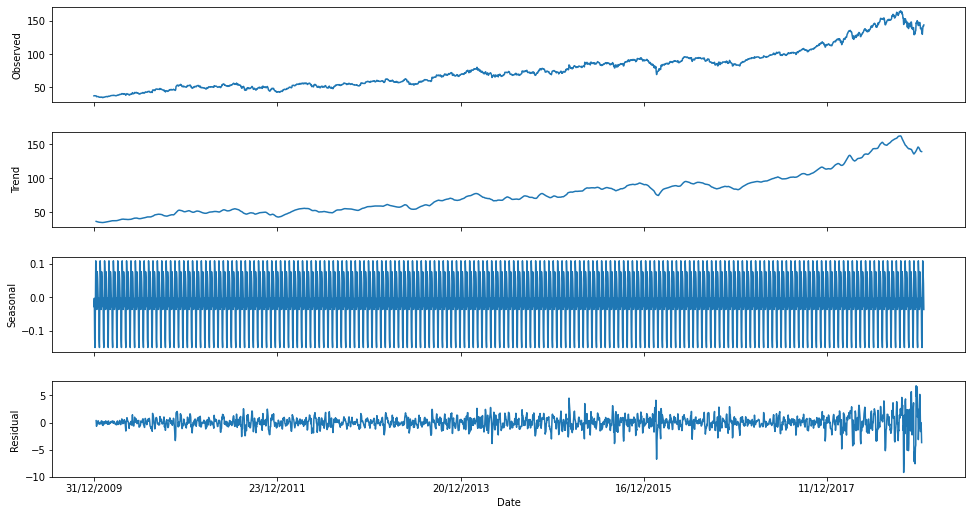

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Close'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [11]:
result = adfuller(df['Close'])

In [12]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.27903588129633866
p-value : 0.9763619547679433
#Lags Used : 24
Number of Observations Used : 2240
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [13]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
df['Close First Difference'] = df['Close'] - df['Close'].shift(1)

In [15]:
adf_check(df['Close First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.068491109298344
p-value : 4.366596702701172e-15
#Lags Used : 27
Number of Observations Used : 2236
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


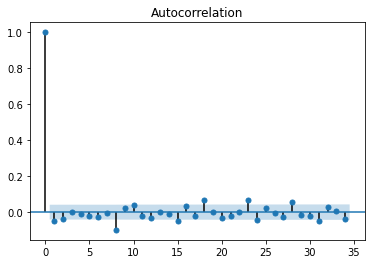

In [16]:
fig_first = plot_acf(df["Close First Difference"].dropna())

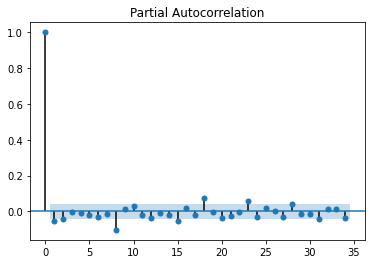

In [17]:
result = plot_pacf(df["Close First Difference"].dropna())

In [23]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 2.9785617894958984


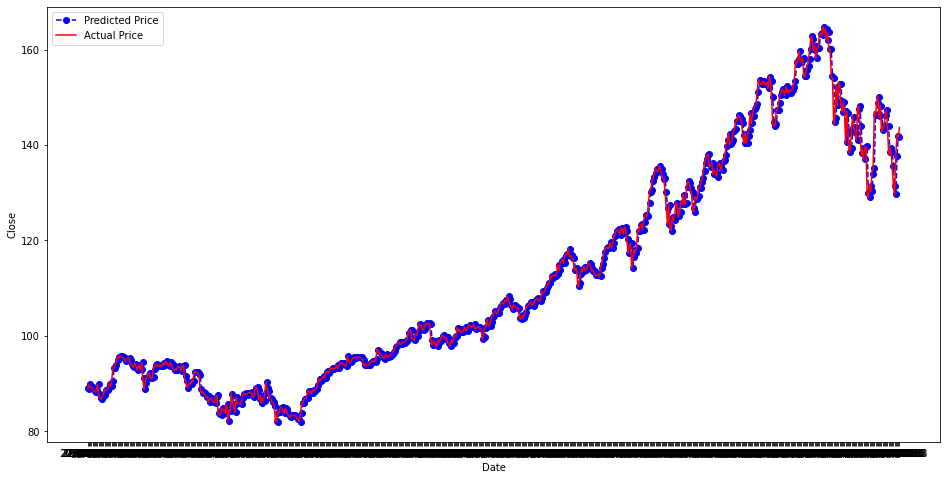

In [26]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(16,8))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()


In [27]:
from google.colab import files
uploaded = files.upload()

Saving Sample Submission.csv to Sample Submission.csv


In [28]:
df_submission = pd.read_csv('Sample Submission.csv')

In [29]:
predictions = []
N_test_observations = len(df_submission)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0][0]
    predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

In [30]:
df_submission = df_submission.copy(deep=True)
df_submission['Close'] = predictions
df_submission.to_csv('arima_model.csv', index=False)

In [31]:
files.download('arima_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>